In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite as bip
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator
import matplotlib.ticker as ptick
from pylab import *
from matplotlib import rc
# rc('text', usetex=True)

# フォント
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 描画のサイズ
plt.rcParams['figure.figsize'] = [10, 10]


In [2]:
year_start = 1981
year_end = 2010
year_range = 10


In [18]:
# 各期間データ
sep_year_reg_num_df_dict = {}

year_start = 1981
year_end = 2010
year_range = 10

for year in range(year_start, year_end+1, year_range):
    sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}'] = pd.read_csv(f'../../Data/0_RegNum/app_{year}_{year+year_range-1}.csv', 
                                                                            encoding='utf-8', 
                                                                            sep=',', 
                                                                            dtype={'right_person_name':object, 
                                                                                    'ipc_class':object, 
                                                                                    'reg_num':np.float64})
    
    print(f'=============={year}-{year+year_range-1}==============')
    print('特許権者（次数削減後）:', sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}']['right_person_name'].nunique())
    print('IPCクラス（次数削減後）:', sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}']['ipc_class'].nunique())
    print('=====================================\n')


==============1981-1990==============
特許権者（次数削減後）: 22671
IPCクラス（次数削減後）: 613

==============1991-2000==============
特許権者（次数削減後）: 34375
IPCクラス（次数削減後）: 616

==============2001-2010==============
特許権者（次数削減後）: 37076
IPCクラス（次数削減後）: 617



==============1981-1990==============
70.724083874339
83.91842229194282
88.55985325646314
==============1991-2000==============
69.73113770482662
83.36369679110207
87.87598533432272
==============2001-2010==============
71.52785985504593
84.66128692627997
89.17999714710731


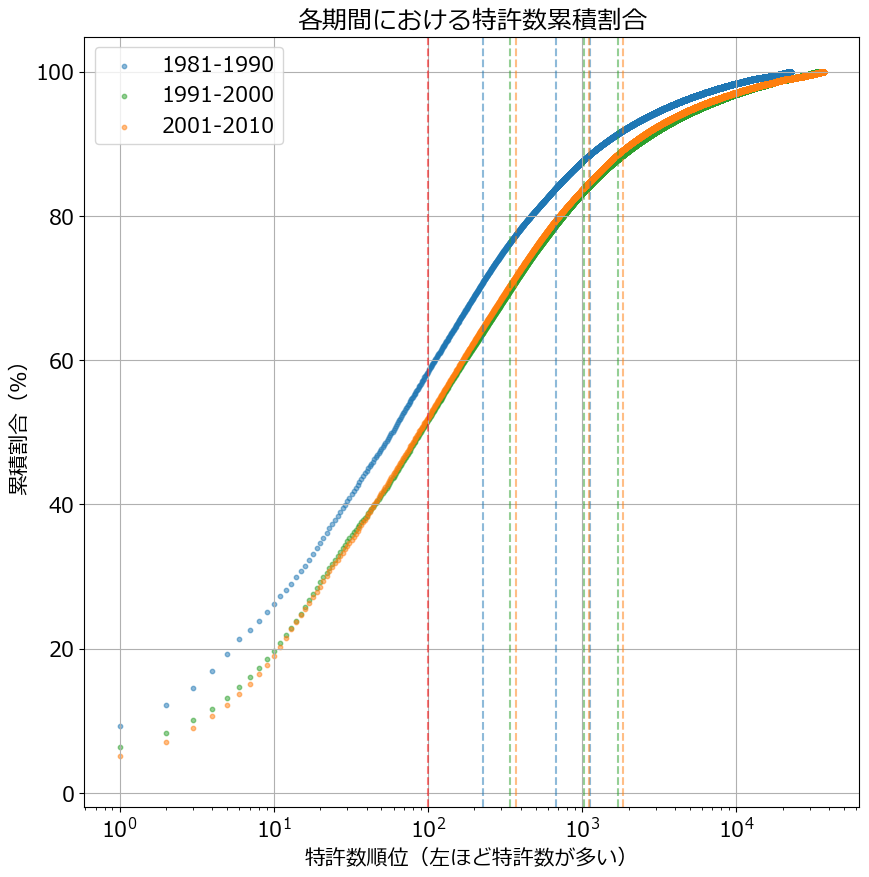

In [50]:
sep_year_reg_p_df_dict = {}
c_list = ['tab:blue', 'tab:green', 'tab:orange']
i = 0
for period, sep_year_reg_num_df in sep_year_reg_num_df_dict.items():
    sep_year_reg_p_df = sep_year_reg_num_df.groupby('right_person_name')[['reg_num']].sum()\
                                            .sort_values('reg_num', ascending=False)\
                                            .reset_index(drop=False).copy()
    sep_year_reg_p_df['p'] = sep_year_reg_p_df['reg_num'] / sep_year_reg_p_df['reg_num'].sum()
    # p_list = sep_year_reg_p_df['p'].tolist()
    # cumsum_p_list = np.cumsum(p_list)
    sep_year_reg_p_df['cumsum_p'] = np.cumsum(sep_year_reg_p_df['p'])*100
    plt.scatter(sep_year_reg_p_df.index, sep_year_reg_p_df['cumsum_p'], label=period, alpha=0.5, s=10, c=c_list[i])
    # plt.axvline(x=100, alpha=0.5, color='red', linestyle='--')
    # plt.axhline(y=sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*1//100, 'cumsum_p'], 
    #             xmin=0,
    #             xmax=len(sep_year_reg_p_df)*1//100,
    #             alpha=0.5, linestyle='--', color=c_list[i])
    # plt.axhline(x=len(sep_year_reg_p_df)*3//100, alpha=0.5, linestyle='--', color=c_list[i])
    # plt.axhline(x=len(sep_year_reg_p_df)*5//100, alpha=0.5, linestyle='--', color=c_list[i])
    
    plt.axvline(x=len(sep_year_reg_p_df)*1//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.axvline(x=len(sep_year_reg_p_df)*3//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.axvline(x=len(sep_year_reg_p_df)*5//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.legend()
    plt.xscale('log')
    plt.title('各期間における特許数累積割合')
    plt.ylabel('累積割合（％）')
    plt.xlabel('特許数順位（左ほど特許数が多い）')
    plt.grid()
    i+=1
    print(f'=============={period}==============')
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*1//100, 'cumsum_p'])
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*3//100, 'cumsum_p'])
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*5//100, 'cumsum_p'])
plt.axvline(x=100, alpha=0.5, color='red', linestyle='--')

    # plt.show()
    # display(sep_year_reg_p_df.head(len(sep_year_reg_p_df)*1//100))
    # print(p_list)